In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from nbodykit.lab import cosmology

In [45]:
cosmo_base = cosmology.Planck15

In [46]:
dict(cosmo_base)

{'output': 'vTk dTk mPk',
 'extra metric transfer functions': 'y',
 'h': 0.6774,
 'N_ur': 2.0328,
 'gauge': 'synchronous',
 'n_s': 0.9667,
 'ln10^{10}A_s': 3.064,
 'k_pivot': 0.05,
 'tau_reio': 0.066,
 'T_cmb': 2.7255,
 'Omega_cdm': 0.2589,
 'Omega_b': 0.0486,
 'Omega_k': 0.0,
 'N_ncdm': 1,
 'm_ncdm': [0.06],
 'P_k_max_h/Mpc': 10.0,
 'z_max_pk': 100.0}

In [47]:
params = ['Omega_cdm', 'Omega_b', 'h']
# colors
nds = len(params)
color_idx = np.linspace(0, 1, nds)
colors = []
for i in range(nds):
    color=plt.cm.rainbow(color_idx[i])
    colors.append(color)   

In [48]:
redshift = 0

smin = 1
smax = 150
s = np.linspace(rmin, rmax, 300)

In [49]:
Plin = cosmology.LinearPower(cosmo_base, redshift, transfer='EisensteinHu')
CF = cosmology.correlation.CorrelationFunction(Plin)
xi_base = CF(s)

In [50]:
cosmo_derivs = []
ds = []
for param in params:
    cosmo_dict = dict(cosmo_base)
    val_base = cosmo_dict[param]
    dval = val_base * 0.01
    ds.append(dval)
    val_new = val_base + dval
    cosmo_dict[param] = val_new
    cosmo_derivs.append(cosmology.Cosmology.from_dict(cosmo_dict))

In [51]:
xis = []
for i in range(len(cosmo_derivs)):
    cosmo = cosmo_derivs[i]
    Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
    CF = cosmology.correlation.CorrelationFunction(Plin)
    xis.append(CF(s))

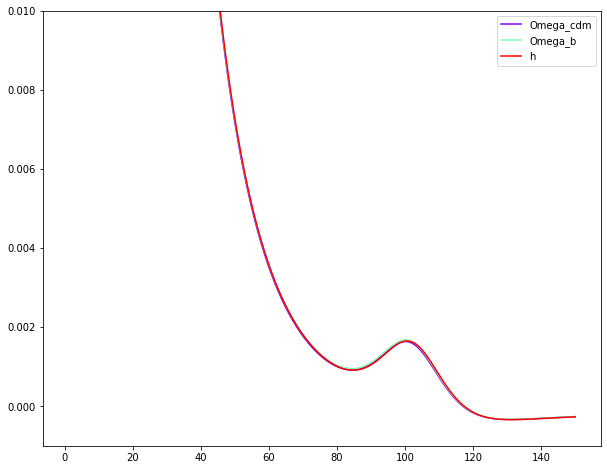

In [52]:
plt.figure(figsize=(10,8))
for i in range(len(cosmo_derivs)):
    plt.plot(s, xis[i], label=params[i], color=colors[i])

#plt.xscale('log')
#plt.yscale('log')
plt.ylim((-0.001, 0.01))

plt.legend()

In [62]:
def partial_derivative(f1, f2, dv):
    df = f2-f1
    deriv = df/dv
    return deriv

In [54]:
dcosmos = []
for i in range(len(params)):
    xi = xis[i]
    dcosmos.append(partial_derivative(xi_base, xi, ds[i]))

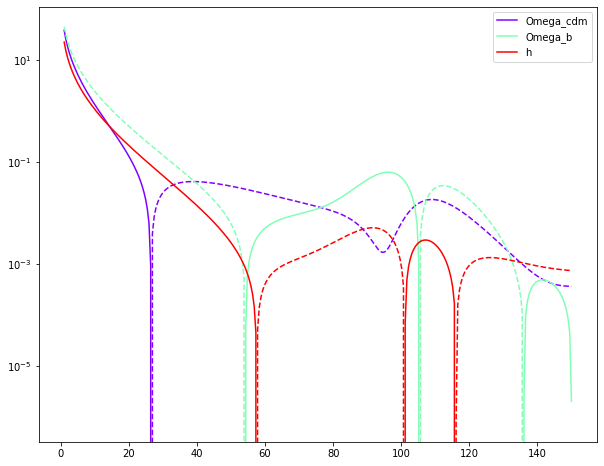

In [74]:
plt.figure(figsize=(10,8))
for i in range(len(cosmo_derivs)):
    plt.plot(s, dcosmos[i], label=params[i], color=colors[i])
    plt.plot(s, -dcosmos[i], ls='--', color=colors[i])

plt.yscale('log')
plt.legend()

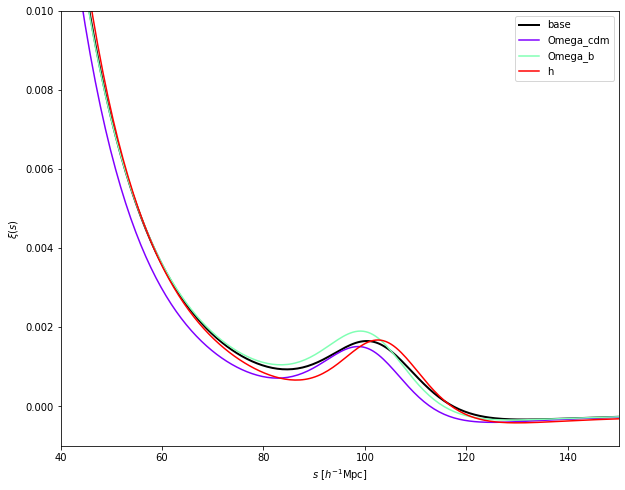

In [64]:
# TODO: h is different than when using astropy (dcosmo.ipynb), investigate

plt.figure(figsize=(10,8))
plt.plot(s, xi_base, ls='-', label='base', color='black', lw=2)
# 10% change
for i in range(nds):
    plt.plot(s, xi_base+10*ds[i]*dcosmos[i], color=colors[i], label=params[i])
    
plt.ylim((-0.001, 0.01))
plt.xlim((0, 200))
#plt.ylim([10**-3, 10**0])

plt.xlabel(r'$s$ $[h^{-1} \mathrm{Mpc}]$')
plt.ylabel(r'$\xi(s)$')
plt.xlim(40,150)
plt.legend()

In [65]:
def gs(X):
    Q, R = np.linalg.qr(X)
    return Q

In [68]:
dcosmos = np.array(dcosmos)
print(dcosmos.shape)

(3, 300)


In [72]:
dcosmos_gs = gs(dcosmos.T).T
print(dcosmos_gs.shape)

(3, 300)


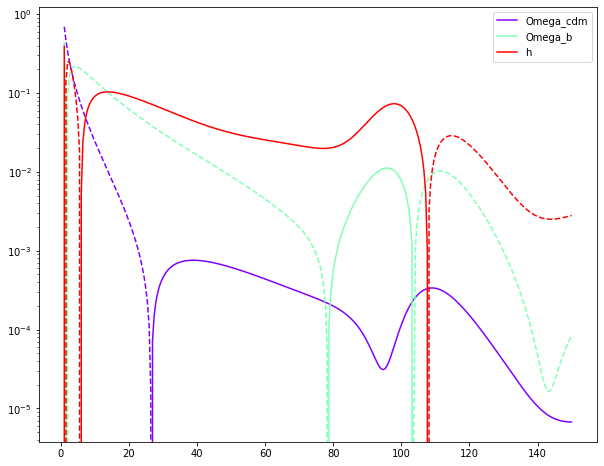

In [75]:
plt.figure(figsize=(10,8))
for i in range(len(cosmo_derivs)):
    plt.plot(s, dcosmos_gs[i], label=params[i], color=colors[i])
    plt.plot(s, -dcosmos_gs[i], ls='--', color=colors[i])

plt.yscale('log')
plt.legend()